In [1]:
import df_model as df
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sps, phot = df.load_training_data(1200000)

Loading Training Data (1/2)
Loading Training Data (2/2)


In [3]:
model = df.load_model("test_32_711553")

[INFO 24-07-02 16:30:57.0580 BST kernel.cc:1233] Loading model from path saved_models/test_32_711553/assets/ with prefix 57e41f440d75484e
[INFO 24-07-02 16:31:01.5287 BST decision_forest.cc:660] Model loaded with 300 root(s), 3902286 node(s), and 5 input feature(s).
[INFO 24-07-02 16:31:01.5287 BST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-07-02 16:31:01.5287 BST kernel.cc:1061] Use fast generic engine


In [4]:
sps, phot = df._get_subsample_of_data(sps, phot, 1200000)
colours, labels, redshifts = df.prepare_data(sps, phot)
train_dataset, test_dataset, train_size, test_size = df.create_test_validation_data(colours, labels, 1.0, 1000)
#model = df.train_model(sps, phot, 32, 0.9, 1000)

43/43 [==============================] - 1s 30ms/step
3192 2966
43/43 [==============================] - 1s 30ms/step
tf.Tensor(
[[39181   333]
 [  559  2633]], shape=(2, 2), dtype=int32)
43/43 [==============================] - 1s 30ms/step
efficency(%):  82.4874686716792
purity(%):  88.7727579231288
interloper fraction(%):  2.832097100472016


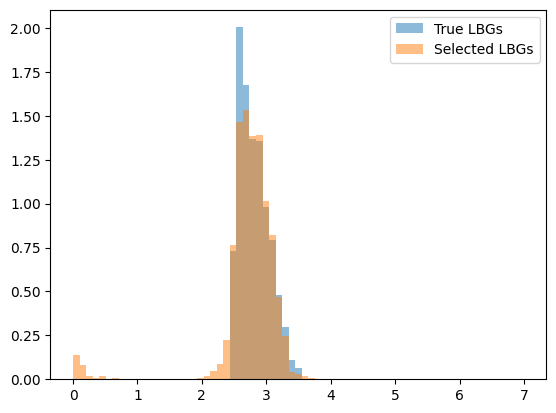

In [7]:
z_bins = np.linspace(0.0, 7.0, 70)
confidence = 0.5
original_objects = df.get_binned_nz(redshifts)
selected_objects = df.get_optimised_nz(model, train_dataset, redshifts, confidence)
plt.hist(original_objects, density=True, label="True LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_objects, density=True, label="Selected LBGs", bins=z_bins, alpha=0.5)
plt.legend()
print(original_objects.shape[0], selected_objects.shape[0])
df.evaluate_model_performance(model, train_dataset, redshifts[:train_size], labels, confidence)

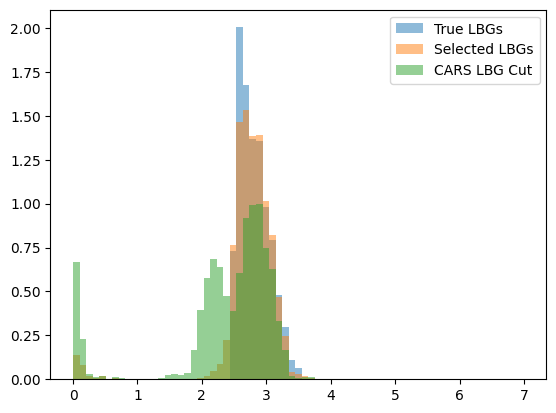

In [6]:
selected_lbgs_trad = df.get_classic_udropouts(colours, redshifts)
plt.hist(original_objects, density=True, label="True LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_objects, density=True, label="Selected LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_lbgs_trad, bins=z_bins, label="CARS LBG Cut", density=True, alpha=0.5)
plt.legend()